# DSE 230 - Final Project - Reddit / Stock Conversations Graph

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import re

## Define Functions

## Load Data

In [2]:
df_posts = pd.read_csv('./data/wsb-aug-2021-posts.csv')
df_comments = pd.read_csv('./data/wsb-aug-2021-comments.csv')

## Clean Data

In [3]:
print(df_posts.shape)
df_posts[df_posts['selftext'].isna()]
df_posts.dropna(subset=['selftext'], inplace=True)
print(df_posts.shape)
df_posts = df_posts[(df_posts['selftext'] != '[removed]') & (df_posts['selftext'] != '[deleted]')]
print(df_posts.shape)

(25751, 12)
(17420, 12)
(766, 12)


In [4]:
print(df_comments.shape)
df_comments[df_comments['body'].isna()]
df_comments.dropna(subset=['body'], inplace=True)
print(df_comments.shape)
df_comments = df_comments[(df_comments['body'] != '[removed]') & (df_comments['body'] != '[deleted]')]
print(df_comments.shape)

(1001160, 10)
(1001158, 10)
(813951, 10)


In [5]:
df_posts['created_utc'] = df_posts['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_posts['selftext'] = df_posts['selftext'].apply(lambda s: re.sub(r'http\S+', '',s))
df_posts['selftext'] = df_posts['selftext'].apply(lambda s: re.sub(r'www\S+', '',s))
df_comments['created_utc'] = df_comments['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_comments['body'] = df_comments['body'].str.replace('\\','')
df_comments['body'] = df_comments['body'].apply(lambda s: re.sub(r'http\S+', '',s))
df_comments['body'] = df_comments['body'].apply(lambda s: re.sub(r'www\S+', '',s))
df_comments['postId_commented_on'] = df_comments['permalink'].str.split('/').str[6]

<ipython-input-5-1b37883448a9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_comments['body'] = df_comments['body'].str.replace('\\','')


In [6]:
clean_posts = df_posts['id'].unique()
df_connected_comments = df_comments[df_comments['postId_commented_on'].isin(clean_posts)].copy()
df_connected_comments.shape

(615920, 11)

In [7]:
df_posts.reset_index(drop=True, inplace=True)
df_comments.reset_index(drop=True, inplace=True)
df_connected_comments.reset_index(drop=True, inplace=True)

In [8]:
df_comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,postId_commented_on
0,comment,hb4hdm3,2th52,wallstreetbets,False,2021-08-31 16:59:54,https://old.reddit.com/r/wallstreetbets/commen...,What's updog,NaN,3,pfdkjw
1,comment,hb4hdm8,2th52,wallstreetbets,False,2021-08-31 16:59:54,https://old.reddit.com/r/wallstreetbets/commen...,Don’t tell em,NaN,1,pfdkjw
2,comment,hb4hdjc,2th52,wallstreetbets,False,2021-08-31 16:59:53,https://old.reddit.com/r/wallstreetbets/commen...,"I realize this, ive been losing thousands shoo...",0.6369,2,pfdkjw
3,comment,hb4hdgo,2th52,wallstreetbets,False,2021-08-31 16:59:52,https://old.reddit.com/r/wallstreetbets/commen...,then it tanks after earnings,0.0000,4,pfgr1h
4,comment,hb4hdeh,2th52,wallstreetbets,False,2021-08-31 16:59:51,https://old.reddit.com/r/wallstreetbets/commen...,Are you saying I should or shouldn’t yolo my l...,0.2732,1,pf3xee


In [9]:
df_posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,pfhpj2,2th52,wallstreetbets,False,2021-08-31 16:39:53,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,&amp;#x200B;\n\n\n\n\n\n# NFA. POSITIONS: [\n\...,$GENI DD | I'm either a $GENIus or a retard. 2...,73
1,post,pfgew5,2th52,wallstreetbets,False,2021-08-31 15:27:03,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,This started about 4 years ago when my son was...,Am I The Asshole for dropping my 6 year old of...,27876
2,post,pfeq9a,2th52,wallstreetbets,False,2021-08-31 13:58:37,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,\n**Can Workhorse Find the Strength to Bounce ...,$WKHS Is A Sleeping Giant,1
3,post,pfdu9b,2th52,wallstreetbets,False,2021-08-31 13:13:51,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,So I was having a look at the [S-4/A form]( fo...,$RKLB: Insiders are incentivized to get the sh...,101
4,post,pfdkjw,2th52,wallstreetbets,False,2021-08-31 13:00:21,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,Your daily trading discussion thread. Please k...,"What Are Your Moves Tomorrow, September 01, 2021",321


In [10]:
df_comments.to_csv('comments_edited.csv', index=False)

## Yahoo Finance

In [11]:
companies = pd.read_csv('./data/Companies.csv')
comps = companies.iloc[:,0]

In [12]:
comp_prices = pd.DataFrame()
for comp in comps:
    tick = yf.Ticker(comp)
    dat = tick.history(start='2020-01-01', end='2021-12-06')
    dat['Delta'] = dat['Close']-dat['Open']
    dat['Ticker'] = comp
    comp_prices = comp_prices.append(dat)
comp_prices = comp_prices.reset_index(drop=False)
comp_prices[['Ticker','Date','Open','Close','Delta']]

,Ticker,Date,Open,Close,Delta
0,AAPL,2020-01-02,72.976015,73.988480,1.012465
1,AAPL,2020-01-03,73.200167,73.269142,0.068975
2,AAPL,2020-01-06,72.372486,73.852989,1.480504
3,AAPL,2020-01-07,73.862835,73.505646,-0.357190
4,AAPL,2020-01-08,73.202637,74.688072,1.485435
...,...,...,...,...,...
37418,GME,2021-11-29,204.000000,202.009995,-1.990005
37419,GME,2021-11-30,200.100006,196.210007,-3.889999
37420,GME,2021-12-01,199.399994,179.839996,-19.559998
37421,GME,2021-12-02,185.000000,181.559998,-3.440002


In [13]:
comp_prices.to_csv('company_prices.csv')

## Exploratory Data Analysis

## Create Graph

## Latent Dirichlet Allocation

In [14]:
df_posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,pfhpj2,2th52,wallstreetbets,False,2021-08-31 16:39:53,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,&amp;#x200B;\n\n\n\n\n\n# NFA. POSITIONS: [\n\...,$GENI DD | I'm either a $GENIus or a retard. 2...,73
1,post,pfgew5,2th52,wallstreetbets,False,2021-08-31 15:27:03,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,This started about 4 years ago when my son was...,Am I The Asshole for dropping my 6 year old of...,27876
2,post,pfeq9a,2th52,wallstreetbets,False,2021-08-31 13:58:37,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,\n**Can Workhorse Find the Strength to Bounce ...,$WKHS Is A Sleeping Giant,1
3,post,pfdu9b,2th52,wallstreetbets,False,2021-08-31 13:13:51,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,So I was having a look at the [S-4/A form]( fo...,$RKLB: Insiders are incentivized to get the sh...,101
4,post,pfdkjw,2th52,wallstreetbets,False,2021-08-31 13:00:21,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,Your daily trading discussion thread. Please k...,"What Are Your Moves Tomorrow, September 01, 2021",321


In [15]:
#import nltk
#nltk.download('wordnet')

Loading dataset...
done in 0.014s.
Extracting tf-idf features for NMF...
done in 7.527s.
Extracting tf features for LDA...
done in 7.334s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=813951 and n_features=1000...


/home/sam/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/sam/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


done in 83.424s.


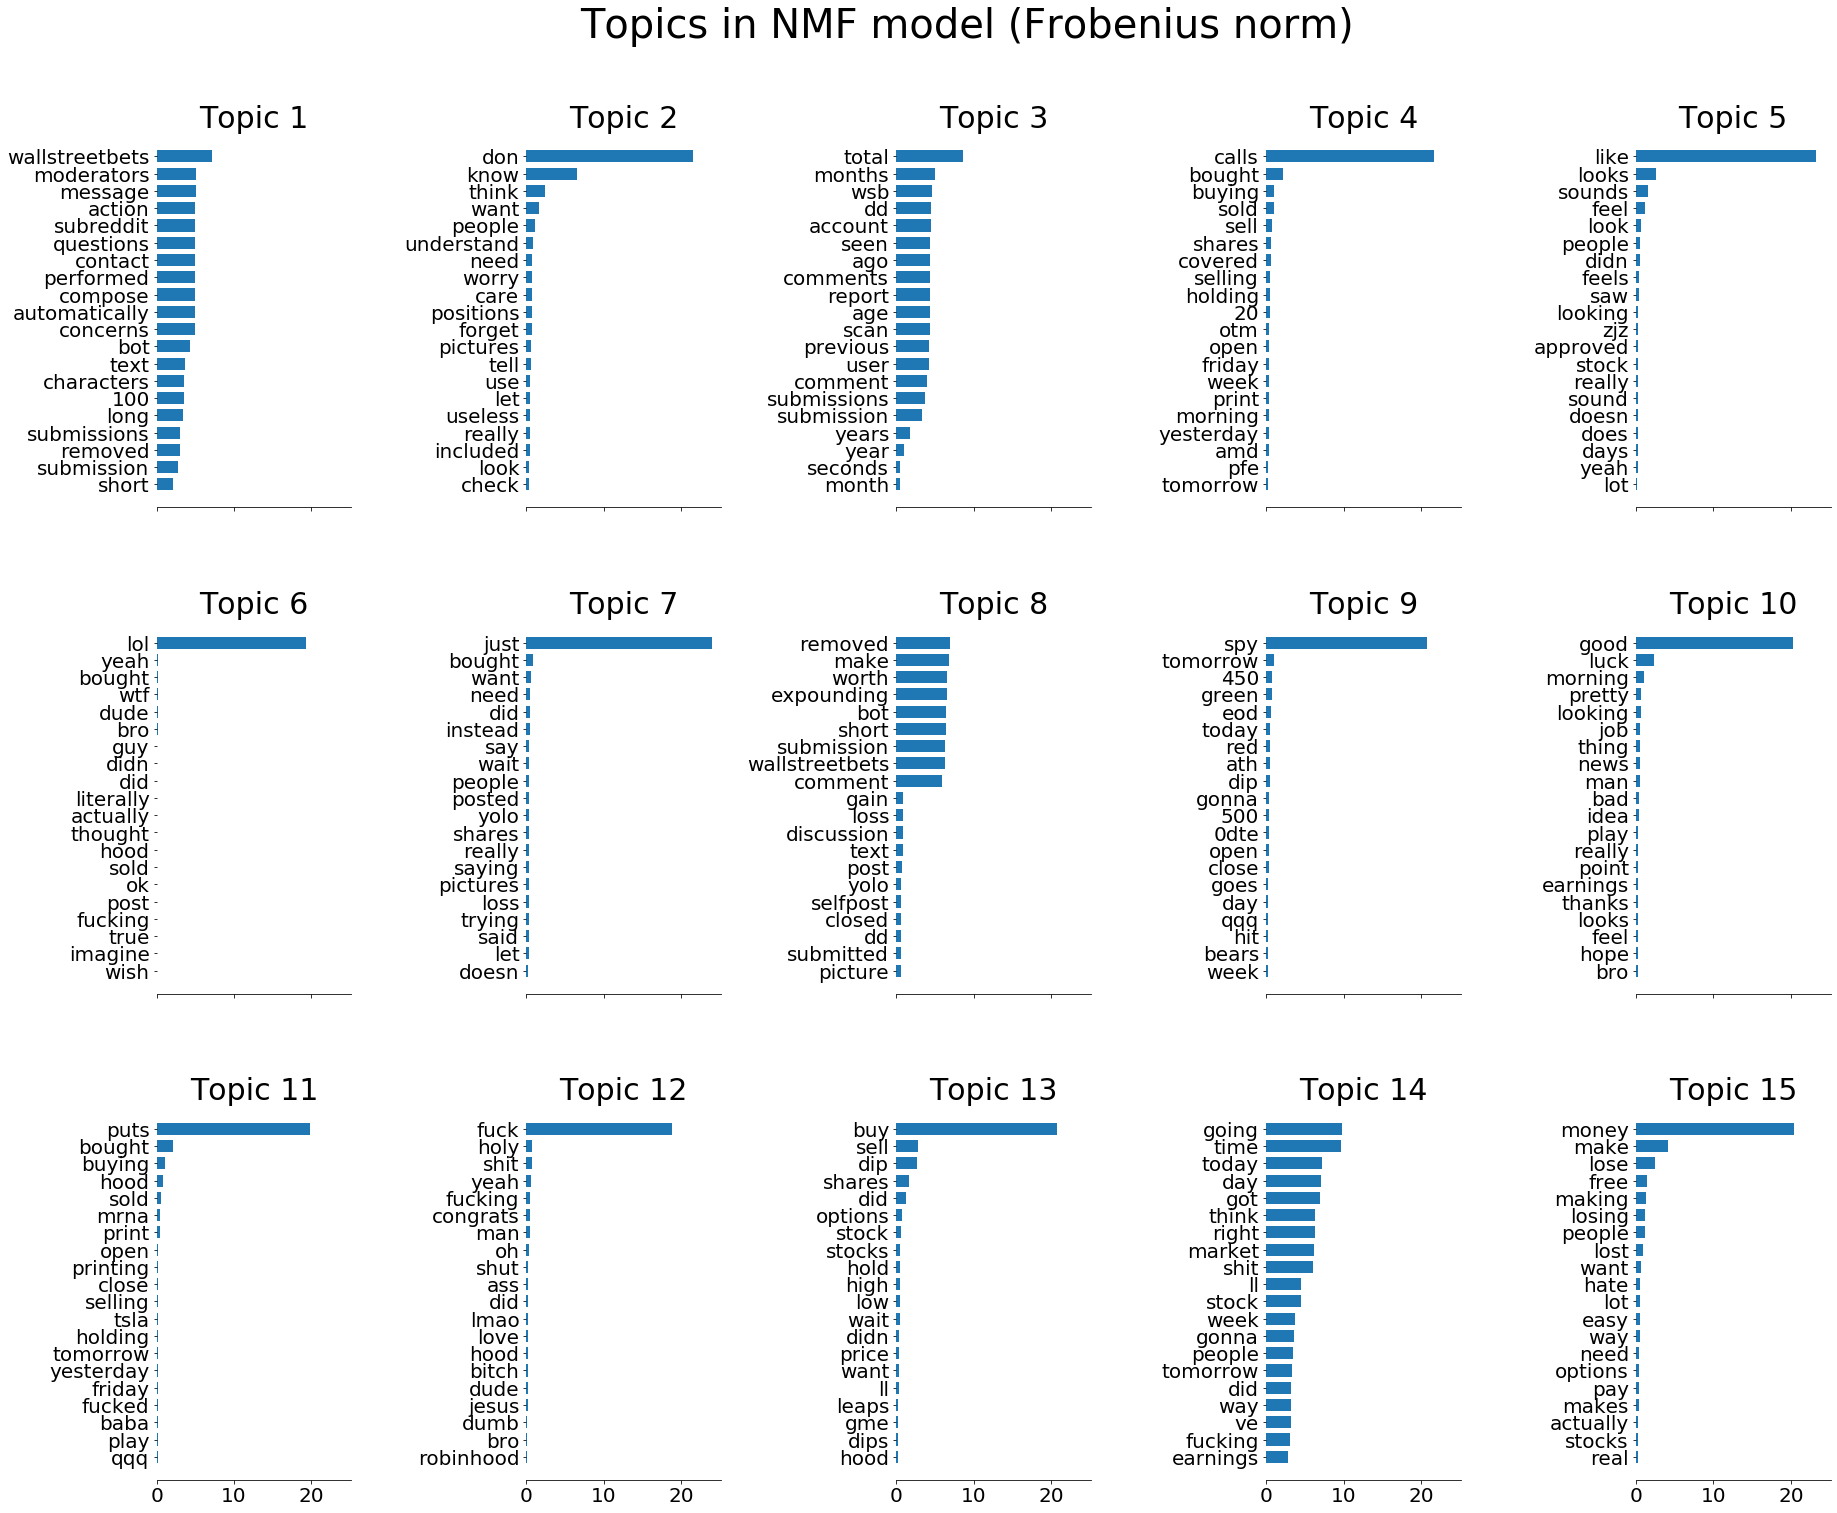



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=813951 and n_features=1000...


/home/sam/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


done in 95.962s.


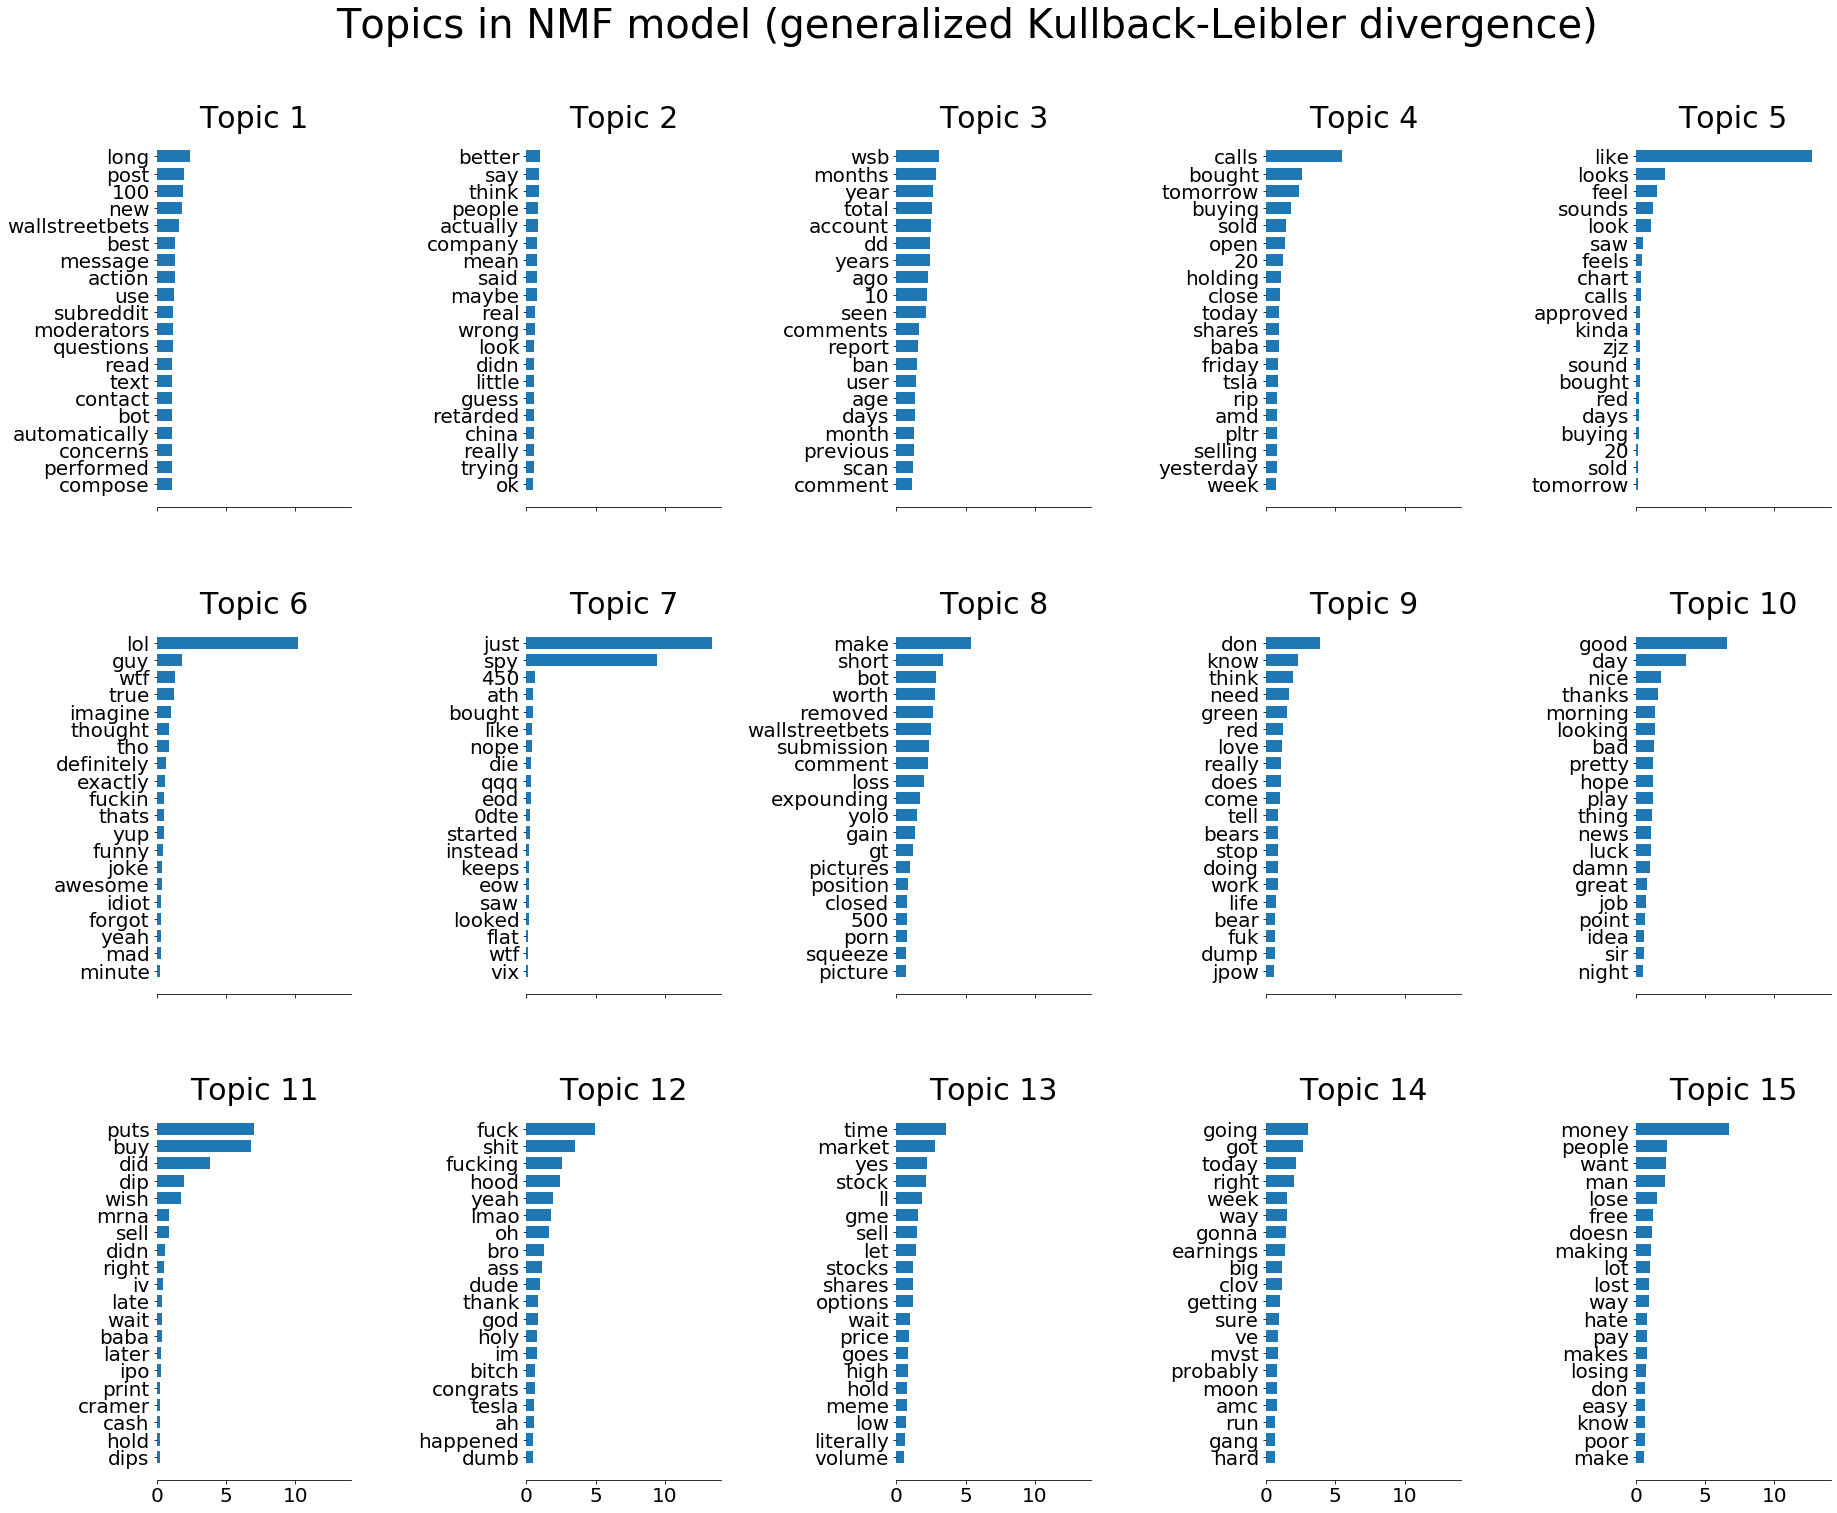



 Fitting LDA models with tf features, n_samples=813951 and n_features=1000...


In [ ]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = len(df_comments['body'].values.tolist())
n_features = 1000
n_components = 15
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(30, 22), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.
print("Loading dataset...")
t0 = time()
data = df_comments['body'].values.tolist()
data_samples = data # data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

### LDA Topics
#### 1. administrative
#### 4. positive connotations
#### 12. transactions
#### 15. banter

#### 2.
#### 3.
#### 5.
#### 6.
#### 7.
#### 8.
#### 9.
#### 10.
#### 11.
#### 13.
#### 14.

In [ ]:
lda.components_[:,0].size

In [ ]:
# cleaned comments
t0 = time()
x=tf_vectorizer.transform(df_comments.iloc[:,7].values.tolist())
y=lda.transform(x)
print("done in %0.3fs." % (time() - t0))

df_comments['topic'] = np.argmax(y, axis=1)
t=pd.Series(np.argmax(y, axis=1)).value_counts(sort=False)
t/t.sum()*100

In [ ]:
# comments with connected post
t0 = time()
x2=tf_vectorizer.transform(df_connected_comments.iloc[:,7].values.tolist())
y2=lda.transform(x2)
print("done in %0.3fs." % (time() - t0))

df_connected_comments['topic'] = np.argmax(y2, axis=1)
t2=pd.Series(np.argmax(y2, axis=1)).value_counts(sort=False)
t2/t2.sum()*100

In [ ]:
# cleaned posts
t0 = time()
x3=tf_vectorizer.transform(df_posts.iloc[:,9].values.tolist())
y3=lda.transform(x3)
print("done in %0.3fs." % (time() - t0))

df_posts['topic'] = np.argmax(y3, axis=1)
df_posts['score'] = y3[np.argmax(y3, axis=1)]
t3=pd.Series(np.argmax(y3, axis=1)).value_counts(sort=False)
t3/t3.sum()*100

In [ ]:
y[1]

In [ ]:
df_comments.iloc[1,7]

In [ ]:
df_posts.shape

In [ ]:
df_posts.head()

In [ ]:
df_posts.to_csv('df_posts.csv')
df_comments.to_csv('df_comments.csv')
df_connected_comments.to_csv('df_connected_comments.csv')